# Frequency analysis - Difference over Sum

## Step 1. Find nitrogenous base frequencies

In [1]:
import os
from Bio import SeqIO
from Bio.Seq import Seq

os.chdir('/home/ubuntu/data')

intr_file = 'hg19_intr_clean.fa'
depl_file = 'hg19_depl_clean.fa'

e = 0
intr_seqs = []
depl_seqs = []
for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
    
    cutoff = 500
    my_intr_seq = str(intr.seq)[0:cutoff]
    my_depl_seq = str(depl.seq)[0:cutoff]
    
    intr_seqs.append(my_intr_seq)
    
    depl_seqs.append(my_depl_seq)

    e = e + 1
    if e%20000 == 0:
        print('Finished ' + str(e) + ' entries')

Finished 20000 entries
Finished 40000 entries
Finished 60000 entries


In [2]:
def getKmers(sequence, size):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

In [3]:
kmer = 1

print('Building Neanderthal introgressed sequences')
intr_sentences = []
for i in range(len(intr_seqs)):
    intr_sentences.append(getKmers(intr_seqs[i], kmer))

print('Building Neanderthal depleted sequences')
depl_sentences = []
for i in range(len(depl_seqs)):
    depl_sentences.append(getKmers(depl_seqs[i], kmer))

Building Neanderthal introgressed sequences
Building Neanderthal depleted sequences


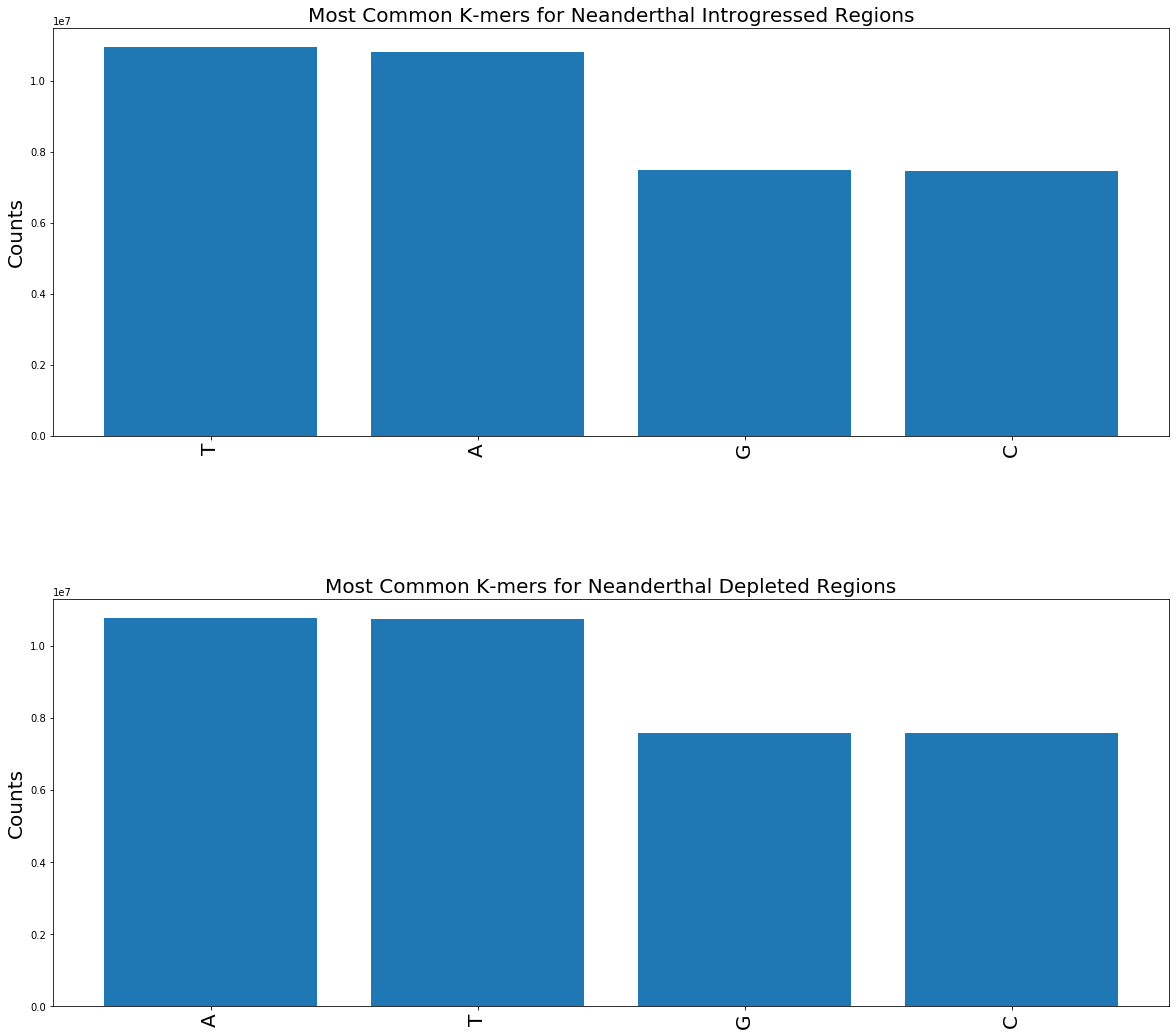

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

plt.subplot(2, 1, 1)
D_intr = dict(Counter([item for sublist in intr_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D_intr)), list(D_intr.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Introgressed Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(range(len(D_intr)), list(D_intr.keys()), fontsize = 20)

D_intr_c=dict(Counter([item for sublist in intr_sentences for item in sublist]))

plt.subplot(2, 1, 2)
D_depl = dict(Counter([item for sublist in depl_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D_depl)), list(D_depl.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Depleted Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(range(len(D_depl)), list(D_depl.keys()), fontsize = 20)

D_depl_c=dict(Counter([item for sublist in intr_sentences for item in sublist]))
               
plt.show()

## Step 2. Find the most predictive words based on frequency

In [5]:
kmer = 10

print('Building Neanderthal introgressed sequences')
intr_sentences = []
for i in range(len(intr_seqs)):
    intr_sentences.append(getKmers(intr_seqs[i], kmer))

print('Building Neanderthal depleted sequences')
depl_sentences = []
for i in range(len(depl_seqs)):
    depl_sentences.append(getKmers(depl_seqs[i], kmer))

Building Neanderthal introgressed sequences
Building Neanderthal depleted sequences


In [6]:
import pandas as pd

intr_counts = dict(Counter([item for sublist in intr_sentences for item in sublist]))
kmers = list(intr_counts.keys())
counts = list(intr_counts.values())
intr_df = pd.DataFrame({'Kmer': kmers, 'Count': counts})
intr_df = intr_df.sort_values(['Count'], ascending = False)
intr_df.head(10)

,Kmer,Count
37228,TTTTTTTTTT,37802
24801,AAAAAAAAAA,21204
26794,TGTGTGTGTG,8106
26793,GTGTGTGTGT,8098
8264,CACACACACA,7152
60375,ACACACACAC,7062
26804,ATATATATAT,4771
26803,TATATATATA,4623
18937,TGTAATCCCA,4075
41207,CTTTTTTTTT,4038


In [7]:
depl_counts = dict(Counter([item for sublist in depl_sentences for item in sublist]))
kmers = list(depl_counts.keys())
counts = list(depl_counts.values())
depl_df = pd.DataFrame({'Kmer': kmers, 'Count': counts})
depl_df = depl_df.sort_values(['Count'], ascending = False)
depl_df.head(10)

,Kmer,Count
17916,AAAAAAAAAA,39256
1597,TTTTTTTTTT,38250
6814,TGTGTGTGTG,7799
19201,CACACACACA,7679
6815,GTGTGTGTGT,7648
64805,ACACACACAC,7590
3893,TGTAATCCCA,5847
716,ATATATATAT,5807
3895,TAATCCCAGC,5717
717,TATATATATA,5700


In [8]:
import numpy as np

merge_df = pd.merge(intr_df, depl_df, on = 'Kmer')
merge_df.columns = ['Kmer','Count_Intr','Count_Depl']
merge_df['DifferenceOverSum'] = (merge_df['Count_Depl'] - merge_df['Count_Intr']) / (merge_df['Count_Depl'] + merge_df['Count_Intr'])

In [9]:
sorted_merge_df = merge_df.sort_values(['DifferenceOverSum'], ascending = False)
sorted_merge_df['PredictPower'] = abs(sorted_merge_df['DifferenceOverSum'])
sorted_merge_df.head(15)

,Kmer,Count_Intr,Count_Depl,DifferenceOverSum,PredictPower
866978,GTGAGGAGCG,1,94,0.978947,0.978947
910008,CGCATATTCT,1,64,0.969231,0.969231
911532,CCGCATATTC,1,61,0.967742,0.967742
840164,TTCCATTCGA,2,114,0.965517,0.965517
868747,TCCATTCGAG,1,57,0.965517,0.965517
901742,ATTCGAGTCC,1,56,0.964912,0.964912
906594,CGCCCCGTCT,1,50,0.960784,0.960784
876276,GAGCCCGCAT,1,49,0.960000,0.960000
898557,TAAACTATCG,1,48,0.959184,0.959184
869067,TGAGATACGT,1,45,0.956522,0.956522


In [10]:
import numpy as np

n = 15

freq_sort_intr = sum(sorted_merge_df["Count_Intr"][0:n])/sum(list(intr_counts.values()))
print(freq_sort_intr)
freq_sort_depl = sum(sorted_merge_df["Count_Depl"][0:n])/sum(list(depl_counts.values()))
print(freq_sort_depl)
rel_freq_intr = np.array(sorted_merge_df["Count_Intr"][0:n]/sum(sorted_merge_df["Count_Intr"][0:n]))
print(rel_freq_intr)
rel_freq_depl = np.array(sorted_merge_df["Count_Depl"][0:n]/sum(sorted_merge_df["Count_Depl"][0:n]))
print(rel_freq_depl)

4.441764086582863e-07
2.370791581213603e-05
[0.0625 0.0625 0.0625 0.125  0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625 0.0625 0.0625 0.0625]
[0.11007026 0.07494145 0.07142857 0.13348946 0.06674473 0.06557377
 0.05854801 0.05737705 0.05620609 0.05269321 0.05269321 0.05152225
 0.05152225 0.04918033 0.04800937]


## Step 3. Build the DNA based on the frequencies

In [11]:
import random
import numpy as np

def DNAgen(length):
    return ''.join(np.random.choice(["A", "T", "C", "G"], 
                                    p=[0.294474, 0.298237, 0.203473, 0.203816]) for _ in range(length))

Idea:
- scelgo la lunghezza complessiva della sequenza di DNA
- genero le parole importanti nel giusto numero
- genero le restanti parole random in modo da arrivare al numero scelto inizialmente
- faccio uno shuffle tenendo fisso il numero di parole

In [12]:
len_dna = 10000000
imp_len_intr = int(freq_sort_intr*len_dna)
imp_len_depl = int(freq_sort_depl*len_dna)
DNA_imp_intr = [None]*imp_len_intr 
DNA_imp_depl = [None]*imp_len_depl

for i in range(imp_len_intr):
    DNA_imp_intr[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_intr)
    
for i in range(imp_len_depl):
    DNA_imp_depl[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_depl)

In [13]:
print(len(DNA_imp_intr), len(DNA_imp_depl))

4 237


In [14]:
DNAc_intr = [None]*int(len_dna/5-len(DNA_imp_intr)) # DNA casuale
DNAc_depl = [None]*int(len_dna/5-len(DNA_imp_depl)) # DNA casuale
print(len(DNAc_intr))

words = ["CCGCG", "CGCGC", "GCGCC", "CGGCG", "CGGCC"]

for i in range(len(DNAc_intr)):
    DNAc_intr[i] = DNAgen(5)
    for w in words:
        while DNAc_intr[i] == w:
            DNAc_intr[i] = DNAgen(5)

print("Finished introgressed")
            
for i in range(len(DNAc_depl)):
    DNAc_depl[i] = DNAgen(5)
    for w in words:
        while DNAc_depl[i] == w:
            DNAc_depl[i] = DNAgen(5)

1999996
Finished introgressed


In [15]:
print(len(DNAc_intr))
print(len(DNAc_depl))

1999996
1999763


In [16]:
from random import shuffle

DNA_complete_intr = DNA_imp_intr + DNAc_intr
shuffle(DNA_complete_intr)
DNA_complete_depl = DNA_imp_depl + DNAc_depl
shuffle(DNA_complete_depl)
DNA_complete = DNA_complete_intr + DNA_complete_depl

print(len(DNA_complete_intr))
print(len(DNA_complete_depl))
print(len(DNA_complete))

2000000
2000000
4000000


In [17]:
sentence = 100

D = ""
j = 1
c = 0
DNA = [None]*int(len(DNA_complete)/sentence)

for i in DNA_complete:
    D = D + i + " "
    if j%100 == 0:
        DNA[c] = D
        D = ""
        c = c + 1
    j = j + 1

In [18]:
print(DNA[0:2])

['TTTGC TGAAA CCTGT CGTTG CTGTG TATTG AAGAA TGATA GCCAG TCGCT GGTGG TGGCT GAAGA ACATT TTGGG ATCGC ATGAT CATGA TTTGC GCAAC AGACA AAAAT GGATA TCCCC TTGGC CATGT TTTAC CACTG CGTGA CATCG CCATC TCCGT AACAG ACGGC CAGTC AACAT CTGGT TGCTT ATAAA CTTTA GCTGA ATTGA TATAA TAATA CAGAT TACGC ACATC CCTTG TTATG AGAAT GGCGA GAATT TGAGT GAGAA AACCA GTTTT CGCCT GAATC CAGCA CAATA CTTTA TTCAC CTTTA GTCTG AAAGT GGAAT GTGGC GGACA TCGGC ACTGG TCTAC GTCCC TCCAT CCATT CAGTT AGCGC CCCTC TTTTC TTCGC AATCA AGCCA CGCTT ATTCA GCTCG GAAGC CATCC AAAGG CTGAA TAACA TGTCA AATGA GGTTG TAGAG CTTTC AAAAT TTTCT ACGTT AGATA GTAAC GCATT ', 'CCAGG GGAAA TAAAT ATTAG TTGGC TTTAT GATAG AGCTG ACATT CTTTG AGCCT TACAA TGTCG CGATG CTTGA TTATA ATAAT TTTAG TTGGC TAGGT AGGTG AGATA AAAAA CAATT AGACA CATCG ATAAA TTATG CATTC CTGAT TAATA TTTCT CGTTT TGTCA AAAGA AGGGT TAACA ACGTG TACTG TAGGG GCTTC GTACA GGGTT TTTAA TCGGC ATGCG GGTCA CTCTA GTTGA TAAAT CGTTT CTTTT ATTTA TGCGT AGTTT TTTAG GAACT GTTAT ACACC AACTT CTCAA CTGTA ATCTT GAGTA TGTGC TTTA

In [19]:
labels = list(np.ones(int(len(DNA)/2))) + list(np.zeros(int(len(DNA)/2)))

In [20]:
print(len(labels))
print(labels[0:5], labels[len(DNA)-5:])

40000
[1.0, 1.0, 1.0, 1.0, 1.0] [0.0, 0.0, 0.0, 0.0, 0.0]


## Step 4. LSTM 

In [21]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU, Bidirectional

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(DNA)

encoded_docs = tokenizer.texts_to_sequences(DNA)
max_length = max([len(s.split()) for s in DNA])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')

print(X)
print('\n')
print(X.shape)

[[199 139 601 ... 115 444 363]
 [981 459  21 ... 358   8 933]
 [ 62 929 199 ... 201 522 623]
 ...
 [176  76 542 ... 398 510 231]
 [762 656  89 ... 798 468 536]
 [700 393 614 ... 371 765  82]]


(40000, 100)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20, random_state = 42)

In [24]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [25]:
print(X_train.shape)
print(X_test.shape)

(32000, 100)
(8000, 100)


In [26]:
max_length = max([len(s.split()) for s in DNA])
print(max_length)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

100
1037


In [27]:
model = Sequential()
model.add(Embedding(vocab_size, 10)) 
model.add(Bidirectional(LSTM(10)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

epochs = 5
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 10)          10370     
_________________________________________________________________
bidirectional (Bidirectional (None, 20)                1680      
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 12,271
Trainable params: 12,271
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history = model.fit(X_train, y_train, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 32, shuffle = True)

Train on 25600 samples, validate on 6400 samples
Epoch 1/5
25600/25600 [==============================] - 24s 940us/sample - loss: 0.6933 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4984
Epoch 2/5
25600/25600 [==============================] - 18s 721us/sample - loss: 0.6905 - accuracy: 0.5276 - val_loss: 0.6949 - val_accuracy: 0.5019
Epoch 3/5
25600/25600 [==============================] - 19s 739us/sample - loss: 0.6742 - accuracy: 0.5827 - val_loss: 0.7070 - val_accuracy: 0.4963
Epoch 4/5
25600/25600 [==============================] - 15s 590us/sample - loss: 0.6567 - accuracy: 0.6146 - val_loss: 0.7222 - val_accuracy: 0.5000
Epoch 5/5
25600/25600 [==============================] - 14s 562us/sample - loss: 0.6434 - accuracy: 0.6344 - val_loss: 0.7584 - val_accuracy: 0.5003


Confusion matrix:
 [[1782 2204]
 [1872 2142]]


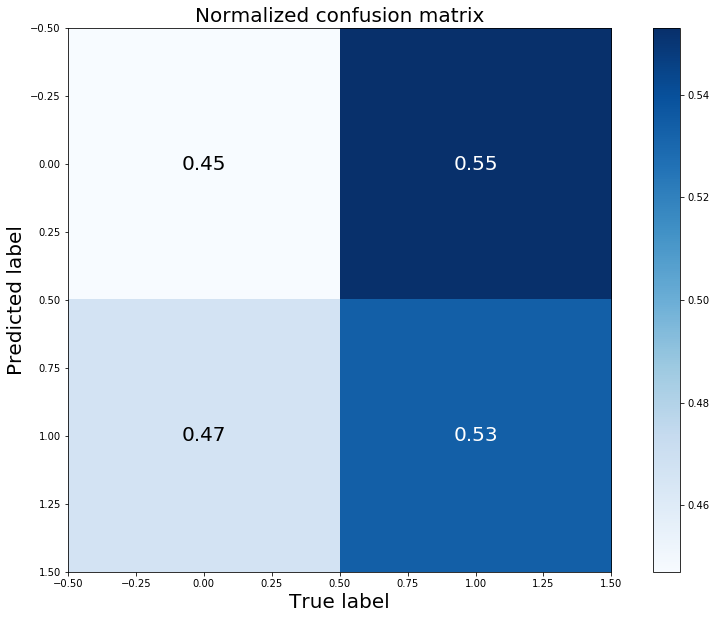

In [29]:
plt.figure(figsize = (15,10))

predicted_labels = model.predict(X_test)
cm = confusion_matrix(y_test, [np.round(i[0]) for i in predicted_labels])
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 20)
plt.colorbar()
plt.xlabel('True label', fontsize = 20)
plt.ylabel('Predicted label', fontsize = 20)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()

In [30]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 49.05%
